## Install

In [310]:
# !pip install pandas numpy matplotlib 
# !pip install openpyxl # for excel files
# !pip freeze > requirements.txt

     -------------------------------------- 242.1/242.1 kB 1.9 MB/s eta 0:00:00


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Pandas Series

pandas series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. Pandas Series is nothing but a column in an excel sheet.
 

In [3]:
list1 = [99, 98, 97, 96, 95, 94, 93, 92, 91, 90]

# list to pandas series
series1 = pd.Series(list1)
print(series1)



0    99
1    98
2    97
3    96
4    95
5    94
6    93
7    92
8    91
9    90
dtype: int64


Accessing data from Pandas Series can be done by passing the position of the item to be accessed. for python 0 based indexing is used. So, the first item is accessed by passing 0 and the second item is accessed by passing 1 and so on.

In [4]:
print( series1[0]) # first element
print(series1[2:4]) # 3rd and 4th element and exclude 5th element

99
2    97
3    96
dtype: int64


Accessing pandas series by label (index)  similiar to acceesing dictionary by key.

In [5]:
list2=[15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
series2 = pd.Series(list2, index=[100,99,98,97,96,95,94,93,92,91])   
print(series2[100]) # first element

15


.iloc[]  is integer based slicing. It is used to access the data by passing the integer location of the item. for pyhton it starts with 0

In [6]:
series2.iloc[2] # 3rd element 

13

## Pandas Dataframe

In [7]:
student_df=pd.read_csv("student.csv", index_col="name")  #assigning index column to name instead of default index column
# student_df.head()
# student_df.tail()
# student_df.shape
student_df.info()
student_df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, John Deo to Rows Noump
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   35 non-null     object 
 1   mark    33 non-null     float64
 2   gender  33 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


,mark
count,33.000000
mean,74.242424
std,16.735125
min,18.000000
25%,60.000000
50%,79.000000
75%,88.000000
max,96.000000


renaming column

In [8]:
# rename Class to  Standard
student_df.rename(columns={"class":"standard"}, inplace=True)  # as class is a keyword in python
student_df.head()

,standard,mark,gender
name,,,
John Deo,Four,NaN,female
Max Ruin,Three,85.0,NaN
Arnold,Three,55.0,male
Krish Star,Four,60.0,female
John Mike,Four,60.0,female


In [9]:
#selecting a column
class1=student_df["standard"]  
class1.head() # first 5 rows of class column with index as name


name
John Deo       Four
Max Ruin      Three
Arnold        Three
Krish Star     Four
John Mike      Four
Name: standard, dtype: object

loc[] is label based slicing. It is used to access the data by passing the label of the item.

In [10]:
# loc[] is used to select rows and columns by label
# iloc[] is used to select rows and columns by integer position
# select a row
student_df.loc[student_df.standard=='Five'] 

,standard,mark,gender
name,,,
Asruid,Five,85.0,male
Honny,Five,75.0,male


adding new column agefor 35 students

In [11]:

student_df["age"]=[35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
student_df.head()


,standard,mark,gender,age
name,,,,
John Deo,Four,NaN,female,35
Max Ruin,Three,85.0,NaN,34
Arnold,Three,55.0,male,33
Krish Star,Four,60.0,female,32
John Mike,Four,60.0,female,31


Broadcasting in pandas is a powerful feature that allows you to apply a function to every row or column of a DataFrame. It is a very useful feature when you want to perform some operation on every row or column of a DataFrame.

broadcasting operation on columns

In [12]:

updated_df=student_df["age"]+5 # adding 5 to  every age in age column
updated_df.head()


name
John Deo      40
Max Ruin      39
Arnold        38
Krish Star    37
John Mike     36
Name: age, dtype: int64

boradcasting usinfg apply function

In [13]:

# df having column status that grade students based on their marks 

student_df["status"]=student_df["mark"].apply(lambda x: "A" if x>60 else "B") # status column is added to df
student_df.head()



,standard,mark,gender,age,status
name,,,,,
John Deo,Four,NaN,female,35,B
Max Ruin,Three,85.0,NaN,34,A
Arnold,Three,55.0,male,33,B
Krish Star,Four,60.0,female,32,B
John Mike,Four,60.0,female,31,B


describe (include=object) gives the count, unique, top, freq of the object type columns

In [14]:
# student_df.describe(include=object) # only object type columns are shown

#maake copy and reset index
student_df_copy=student_df.copy()
student_df_copy.reset_index(inplace=True)
student_df_copy.head()


student_df_copy.describe(include=object) # only object type columns are shown




,name,standard,gender,status
count,35,35,33,35
unique,35,8,2,2
top,John Deo,Seven,male,A
freq,1,10,17,24


value_counts() function

In [16]:

# student_df["status"].value_counts() # count of A and B in status column 

student_df['standard'].value_counts()  
 

Seven    10
Four      9
Six       7
Three     3
Five      2
Nine      2
Fifth     1
Eight     1
Name: standard, dtype: int64

drop dataframe with null values

In [ ]:

# student_df.info() # shows that mark and gender have null values 
copy_df=student_df.dropna(inplace=False) # inplace=True will make changes in original df
#dropna() will drop all rows with null values in any column
#inplace=True will make changes in original df

copy_df.head()

# copy_df.info() # sshows that rows with null values are dropped


,class,mark,gender,age,status
name,,,,,
Arnold,Three,55.0,male,33,B
Krish Star,Four,60.0,female,32,B
John Mike,Four,60.0,female,31,B
Alex John,Four,55.0,male,30,B
My John Rob,Fifth,78.0,male,29,A


Fill null values

In [ ]:
# fill null values 
copy_df=student_df.fillna(0) # fill null values with 0 in whole dataframe( evry column)

# # fill null values in mark column only with mean of mark column 
# copy_df=student_df.fillna({"mark":student_df["mark"].mean()}) 

# # fill null values in gender column only with 'male'
# copy_df=student_df.fillna({"gender":'male'})

#combining into single code
copy_df=student_df.fillna({"mark":student_df["mark"].mean(),"gender":'male'})


# shows that null values are filled with 0
copy_df.head()

,class,mark,gender,age,status
name,,,,,
John Deo,Four,74.242424,female,35,B
Max Ruin,Three,85.000000,male,34,A
Arnold,Three,55.000000,male,33,B
Krish Star,Four,60.000000,female,32,B
John Mike,Four,60.000000,female,31,B


In [22]:
student_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      35 non-null     object 
 1   standard  35 non-null     object 
 2   mark      33 non-null     float64
 3   gender    33 non-null     object 
 4   age       35 non-null     int64  
 5   status    35 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ KB


astype() function is used to convert the datatype of the series to the specified datatype.

In [27]:
#Convert age column  to int32
student_df_copy['age']=student_df_copy['age'].astype('int32')
student_df_copy.info() #hence decreasing the memory usage  of age column

#int64 vs int32 
# int64 uses 8 bytes of memory to store a value  and gives range of -9223372036854775808 to 9223372036854775807
# int32 uses 4 bytes of memory to store a value == int and gives range of -2147483648 to 2147483647
# int16 uses 2 bytes of memory to store a value  and gives range of -32768 to 32767
#int 8 uses 1 byte of memory to store a value   (int8 is not used in pandas) and gives range of -128 to 127


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      35 non-null     object 
 1   standard  35 non-null     object 
 2   mark      33 non-null     float64
 3   gender    33 non-null     object 
 4   age       35 non-null     int32  
 5   status    35 non-null     object 
dtypes: float64(1), int32(1), object(4)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      35 non-null     object 
 1   standard  35 non-null     object 
 2   mark      33 non-null     float64
 3   gender    33 non-null     object 
 4   age       35 non-null     int8   
 5   status    35 non-null     object 
dtypes: float64(1), int8(1), object(4)
memory usage: 1.5+ KB


is_na() function is used to check if the value is null or not in the dtaframe and returns a boolean value.

In [19]:
# rows with null values
student_df.isna().any()  # Null columns has value True

standard    False
mark         True
gender       True
age         False
status      False
dtype: bool

isnull() function is used to check if the value is null or not in the dtaframe and returns a boolean value.

In [30]:
student_df.isnull().sum() # count of null values in each column


standard    0
mark        2
gender      2
age         0
status      0
dtype: int64

<AxesSubplot: >

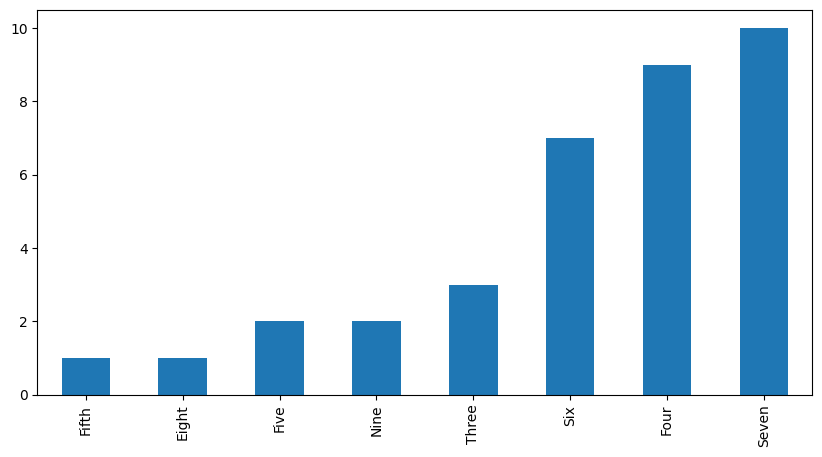

In [38]:
# plot standard   vs  count of students in each standard
student_df_copy['standard'].value_counts().sort_values().plot(kind='bar', figsize=(10,5))

<AxesSubplot: ylabel='Frequency'>

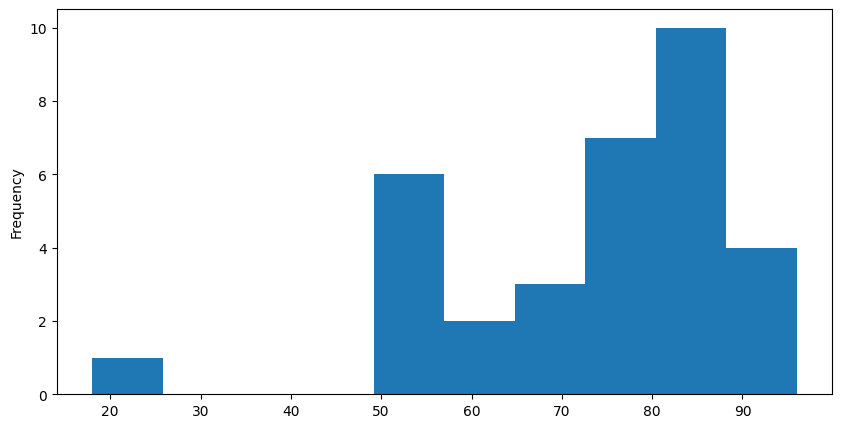

In [44]:
# plot hisstogram of marks
student_df_copy['mark'].plot(kind='hist', figsize=(10,5))


<AxesSubplot: xlabel='age', ylabel='mark'>

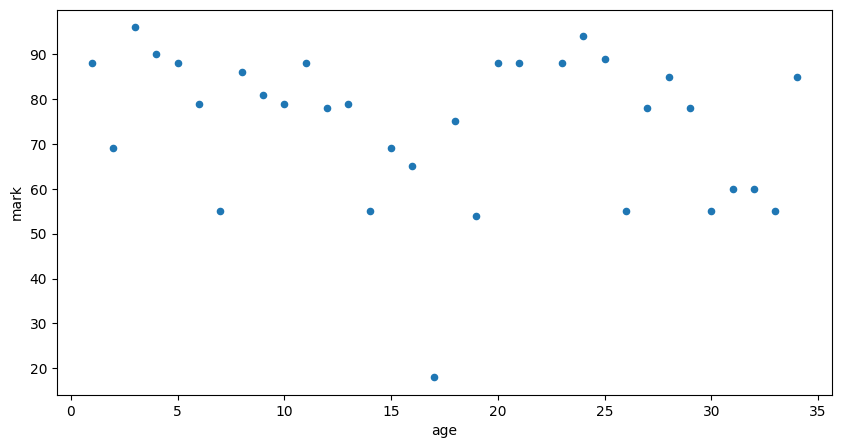

In [57]:
# scatter plot of age vs mark
student_df_copy.plot(kind='scatter', x='age', y='mark', figsize=(10,5))

In [71]:
# top 10 student with highest marks

top_student=student_df.nlargest(10, 'mark')
top_student.head(10)


,standard,mark,gender,age,status
name,,,,,
Kenn Rein,Six,96.0,female,3,A
Recky,Six,94.0,female,24,A
Binn Rott,Seven,90.0,female,4,A
Ronald,Six,89.0,female,25,A
Kty,Seven,88.0,female,23,A
Tade Row,Four,88.0,male,21,A
Gimmy,Four,88.0,male,20,A
Giff Tow,Seven,88.0,male,11,A
Marry Toeey,Four,88.0,male,5,A


sort_values() function is used to sort the values in the dataframe.

In [74]:
sortdf=student_df_copy.sort_values(by='age')
sortdf.head()

,name,standard,mark,gender,age,status
34,Rows Noump,Six,88.0,female,1,A
33,Gain Toe,Seven,69.0,male,2,A
32,Kenn Rein,Six,96.0,female,3,A
31,Binn Rott,Seven,90.0,female,4,A
30,Marry Toeey,Four,88.0,male,5,A


sort_index() function is used to sort the index in the dataframe.


In [79]:
sortdf=student_df.sort_index() # sort index name in acending order
sortdf.head()

,standard,mark,gender,age,status
name,,,,,
Alex John,Four,55.0,male,30,B
Arnold,Three,55.0,male,33,B
Asruid,Five,85.0,male,28,A
Babby John,Four,69.0,female,15,A
Big John,Four,55.0,female,26,B


filtering

In [101]:
student_df_copy.filter(items=['age', 'mark']).head() # filter columns


,age,mark
34,1,88.0
33,2,69.0
32,3,96.0
31,4,90.0
30,5,88.0


between() function is used to filter the values between the given range.

In [106]:
student_df_copy[student_df_copy['age'].between(20,30)].head() # filter rows with age between 20 and 30

,name,standard,mark,gender,age,status
15,Gimmy,Four,88.0,male,20,A
14,Tade Row,Four,88.0,male,21,A
13,Bigy,Seven,NaN,female,22,B
12,Kty,Seven,88.0,female,23,A
11,Recky,Six,94.0,female,24,A


duplicate() function is used to check if the value is duplicate or not in the dtaframe and returns a boolean value.

In [110]:
student_df_copy[student_df_copy.duplicated()] # no duplicate rows

,name,standard,mark,gender,age,status


unique() function is used to get the unique values in the dataframe for given class

In [113]:
# #unique values in each column
# student_df_copy.nunique() #nunique() is used to count unique values in each column

#unique()
student_df_copy['standard'].unique()


array(['Six', 'Seven', 'Four', 'Three', 'Eight', 'Nine', 'Five', 'Fifth'],
      dtype=object)

set reset index

In [117]:
# student_df_copy.set_index('name', inplace=True)
# student_df_copy.head()

#reset index
student_df_copy.reset_index(inplace=True)
student_df_copy.head()

,name,standard,mark,gender,age,status
0,Rows Noump,Six,88.0,female,1,A
1,Gain Toe,Seven,69.0,male,2,A
2,Kenn Rein,Six,96.0,female,3,A
3,Binn Rott,Seven,90.0,female,4,A
4,Marry Toeey,Four,88.0,male,5,A


where , sort_values

In [123]:
student_df_copy.where(student_df_copy['age']>20).sort_values(by='age', ascending=False).head(10) # filter rows with age greater than 20 and sort by age in descending order

,name,standard,mark,gender,age,status
34,John Deo,Four,NaN,female,35.0,B
33,Max Ruin,Three,85.0,NaN,34.0,A
32,Arnold,Three,55.0,male,33.0,B
31,Krish Star,Four,60.0,female,32.0,B
30,John Mike,Four,60.0,female,31.0,B
29,Alex John,Four,55.0,male,30.0,B
28,My John Rob,Fifth,78.0,male,29.0,A
27,Asruid,Five,85.0,male,28.0,A
26,Tes Qry,Six,78.0,male,27.0,A
25,Big John,Four,55.0,female,26.0,B


query

In [132]:
student_df_copy.query('age>20' ).sort_values(by='age', ascending=False).head(10) 
#query() different from where() as it can be used to filter rows with multiple conditions
student_df_copy.query('age>20 and mark>50' ).sort_values(by='age', ascending=False).head(10)
 

,name,standard,mark,gender,age,status
33,Max Ruin,Three,85.0,NaN,34,A
32,Arnold,Three,55.0,male,33,B
31,Krish Star,Four,60.0,female,32,B
30,John Mike,Four,60.0,female,31,B
29,Alex John,Four,55.0,male,30,B
28,My John Rob,Fifth,78.0,male,29,A
27,Asruid,Five,85.0,male,28,A
26,Tes Qry,Six,78.0,male,27,A
25,Big John,Four,55.0,female,26,B
24,Ronald,Six,89.0,female,25,A


## Working with text data

string methods in pandas 

In [165]:
#upper case
student_df_copy['standard'].str.upper().head()


0      SIX
1    SEVEN
2      SIX
3    SEVEN
4     FOUR
Name: standard, dtype: object

In [158]:
# length of each name
student_df_copy['name'].str.len().head()

0    10
1     8
2     9
3     9
4    11
Name: name, dtype: int64

In [162]:
#replace
student_df_copy['standard'].str.replace('Five', '5') 

0       Six
1     Seven
2       Six
3     Seven
4      Four
5       Six
6     Seven
7     Seven
8     Three
9     Seven
10    Seven
11    Seven
12    Eight
13    Seven
14     Four
15     Nine
16     Nine
17        5
18      Six
19     Four
20     Four
21    Seven
22    Seven
23      Six
24      Six
25     Four
26      Six
27        5
28    Fifth
29     Four
30     Four
31     Four
32    Three
33    Three
34     Four
Name: standard, dtype: object

In [163]:
#contains
student_df_copy[student_df_copy['standard'].str.contains('Five')].head()

,name,standard,mark,gender,age,status
17,Honny,Five,75.0,male,18,A
27,Asruid,Five,85.0,male,28,A


In [166]:
#startswith
student_df_copy[student_df_copy['name'].str.startswith('A')].head()

,name,standard,mark,gender,age,status
27,Asruid,Five,85.0,male,28,A
29,Alex John,Four,55.0,male,30,B
32,Arnold,Three,55.0,male,33,B


In [172]:
#split
student_df_copy['name'].str.split(' ').head()

0     [Rows, Noump]
1       [Gain, Toe]
2      [Kenn, Rein]
3      [Binn, Rott]
4    [Marry, Toeey]
Name: name, dtype: object

## MultiIndex 

In [175]:
#multiindex is used to group data in dataframe . It is used to group data by multiple columns and perform operations on them 
multi_df=student_df_copy.set_index(['standard', 'name'])
multi_df.head()


,,mark,gender,age,status
standard,name,,,,
Six,Rows Noump,88.0,female,1,A
Seven,Gain Toe,69.0,male,2,A
Six,Kenn Rein,96.0,female,3,A
Seven,Binn Rott,90.0,female,4,A
Four,Marry Toeey,88.0,male,5,A


In [181]:
#get label of index
multi_df.index.names


FrozenList(['standard', 'name'])

In [189]:
#sort index
multi_df.sort_index(inplace=True, ascending=False)
multi_df.head()

mark  gender  age status
standard name                              
Three    Max Ruin  85.0     NaN   34      A
         Big Nose  81.0  female    9      A
         Arnold    55.0    male   33      B
Six      Tumyu     54.0    male   19      B
         Tes Qry   78.0    male   27      A

In [192]:
#transspose  exchange rows and columns
multi_df.transpose().head()
# multi_df.T.head() # same as above


standard    Three                   Six                                       \
name     Max Ruin Big Nose Arnold Tumyu Tes Qry Rows Noump  Ronald Reppy Red   
mark         85.0     81.0   55.0  54.0    78.0       88.0    89.0      79.0   
gender        NaN   female   male  male    male     female  female    female   
age            34        9     33    19      27          1      25         6   
status          A        A      B     B       A          A       A         A   

standard                    ...      Four                                     \
name       Recky Kenn Rein  ... John Mike John Deo Gimmy Big John Babby John   
mark        94.0      96.0  ...      60.0      NaN  88.0     55.0       69.0   
gender    female    female  ...    female   female  male   female     female   
age           24         3  ...        31       35    20       26         15   
status         A         A  ...         B        B     A        B          A   

standard            Five              Fifth Eight  
name     Alex John Honny Asruid My John Rob Herod  
mark          55.0  75.0   85.0        78.0  79.0  
gender        male  male   male        male  male  
age             30    18     28          29    13  
status           B     A      A           A     A  

[4 rows x 35 columns]

In [194]:
#swaplevel() exchange index levels 
multi_df.swaplevel(0,1).head() # 0 and 1 are index levels  and now name is index level 0 and standard is index level 1

,,mark,gender,age,status
name,standard,,,,
Max Ruin,Three,85.0,NaN,34,A
Big Nose,Three,81.0,female,9,A
Arnold,Three,55.0,male,33,B
Tumyu,Six,54.0,male,19,B
Tes Qry,Six,78.0,male,27,A


In [211]:
#stack() 
multi_df.stack()  
# multi_stack=multi_df.stack()  
 
#unstack()  
# multi_stack.unstack().head() 

standard  name               
Three     Max Ruin     mark        85.0
                       age           34
                       status         A
          Big Nose     mark        81.0
                       gender    female
                                  ...  
Fifth     My John Rob  status         A
Eight     Herod        mark        79.0
                       gender      male
                       age           13
                       status         A
Length: 136, dtype: object

In [208]:
#pivot()  
multi_df.pivot(columns='status', values='mark').head() # pivot table with status as columns and mark as values  and index is standard and name


status                   A     B
standard name                   
Eight    Herod        79.0   NaN
Fifth    My John Rob  78.0   NaN
Five     Asruid       85.0   NaN
         Honny        75.0   NaN
Four     Alex John     NaN  55.0

In [209]:
#pivot_table()  used to aggregate data in dataframe
multi_df.pivot_table(index='standard', columns='status', values='mark', aggfunc='mean').head() # aggfunc='mean' is used to calculate mean of marks in each standard and status

status,A,B
standard,,
Eight,79.00,NaN
Fifth,78.00,NaN
Five,80.00,NaN
Four,83.25,57.5
Nine,65.00,18.0


In [217]:
#melt()  used to convert wide table to long table
multi_df.melt(id_vars=['gender', 'status'], value_vars=['mark', 'age'], var_name='column', value_name='value') # id_vars are columns which are not changed and value_vars are columns which are changed and var_name and value_name are new column names

,gender,status,column,value
0,NaN,A,mark,85.0
1,female,A,mark,81.0
2,male,B,mark,55.0
3,male,B,mark,54.0
4,male,A,mark,78.0
...,...,...,...,...
65,male,B,age,30.0
66,male,A,age,18.0
67,male,A,age,28.0
68,male,A,age,29.0


## Groupby

In [224]:
#groupby()   similar to pivot_table() but it is used to group data by single column and perform operations on them
student_df_copy.groupby('standard').mean()# mean of each column in each standard 

C:\Users\amrit\AppData\Local\Temp\ipykernel_21608\1623640851.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  student_df_copy.groupby('standard').mean()# mean of each column in each standard


,mark,age
standard,,
Eight,79.000000,13.000000
Fifth,78.000000,29.000000
Five,80.000000,23.000000
Four,70.375000,23.888889
Nine,41.500000,16.500000
Seven,76.444444,11.300000
Six,82.571429,15.000000
Three,73.666667,25.333333


In [222]:
#first()  returns first row of each group
student_df_copy.groupby('standard').first()

,name,mark,gender,age,status
standard,,,,,
Eight,Herod,79.0,male,13,A
Fifth,My John Rob,78.0,male,29,A
Five,Honny,75.0,male,18,A
Four,Marry Toeey,88.0,male,5,A
Nine,Jackly,65.0,female,16,A
Seven,Gain Toe,69.0,male,2,A
Six,Rows Noump,88.0,female,1,A
Three,Big Nose,81.0,female,9,A


In [226]:
#last()  returns last row of each group
student_df_copy.groupby('standard').last()

,name,mark,gender,age,status
standard,,,,,
Eight,Herod,79.0,male,13,A
Fifth,My John Rob,78.0,male,29,A
Five,Asruid,85.0,male,28,A
Four,John Deo,60.0,female,35,B
Nine,Tinny,18.0,male,17,B
Seven,Kty,88.0,female,23,A
Six,Tes Qry,78.0,male,27,A
Three,Max Ruin,85.0,male,34,A


In [233]:
#groups()  returns groups
# student_df_copy.groupby('standard').groups      # returns groups in dictionary format 

In [231]:
#get_group()  returns group
student_df_copy.groupby('standard').get_group('Five') # returns group of standard Five

,name,standard,mark,gender,age,status
17,Honny,Five,75.0,male,18,A
27,Asruid,Five,85.0,male,28,A


In [238]:
#min()  returns minimum value of each column in each group
# student_df_copy.groupby('standard').min()

#max()  returns maximum value of each column in each group  
# student_df_copy.groupby('standard').max()

#sum()  returns sum of each column in each group
# student_df_copy.groupby('standard').sum()   

#agg()  returns aggregate of each column in each group
# student_df_copy.groupby('standard').agg({'mark': 'mean', 'age': 'max'}) # mean of mark and max of age in each standard 




## MERGE

In [243]:
#merge()  used to merge two dataframes

df1=pd.DataFrame({'name': ['A', 'B', 'C', 'D'], 'age': [20, 21, 22, 23]})
df2=pd.DataFrame({'name': ['A', 'B', 'E', 'D'], 'mark': [50, 60, 70, 80]})

# df3=pd.merge(df1, df2, on='name', how='outer') # outer join
# df3=pd.merge(df1, df2, on='name', how='inner') # inner join
df3=pd.merge(df1, df2, on='name', how='left') # left join
df3.head()


,name,age,mark
0,A,20,50.0
1,B,21,60.0
2,C,22,NaN
3,D,23,80.0


## Conacatination

In [247]:
# concat()  used to concatenate two dataframes
df4=pd.concat([df1, df2], axis=0) # axis=0 means concatenate rows

# df4=pd.concat([df1, df2], axis=1) # axis=1 means concatenate columns
df4


,name,age,mark
0,A,20.0,NaN
1,B,21.0,NaN
2,C,22.0,NaN
3,D,23.0,NaN
0,A,NaN,50.0
1,B,NaN,60.0
2,E,NaN,70.0
3,D,NaN,80.0


In [248]:
# append()  used to append rows to dataframe
df5=df1.append(df2, ignore_index=True) # ignore_index=True means ignore index of df1 and df2 and create new index
df5.head()

C:\Users\amrit\AppData\Local\Temp\ipykernel_21608\2985093427.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5=df1.append(df2, ignore_index=True) # ignore_index=True means ignore index of df1 and df2 and create new index


,name,age,mark
0,A,20.0,NaN
1,B,21.0,NaN
2,C,22.0,NaN
3,D,23.0,NaN
4,A,NaN,50.0


In [252]:
#join used to join two dataframes
# df6=df1.join(df2, lsuffix='_left', rsuffix='_right') # lsuffix and rsuffix are suffixes for columns with same name
df6=df1.join(df2, lsuffix='_left', rsuffix='_right', how='outer') # outer join

df6.head()

,name_left,age,name_right,mark
0,A,20,A,50
1,B,21,B,60
2,C,22,E,70
3,D,23,D,80


## Working with DataTimes

In [255]:
movie_df=pd.DataFrame({'movie': ['movie1', 'movie2', 'movie3', 'movie4', 'movie5', 'movie6', 'movie7', 'movie8', 'movie9', 'movie10'], 'release_date': ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10'], 'collection_count': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]})
movie_df.head()

,movie,release_date,collection_count
0,movie1,2019-01-01,100
1,movie2,2019-01-02,200
2,movie3,2019-01-03,300
3,movie4,2019-01-04,400
4,movie5,2019-01-05,500


In [264]:
movie_df['release_date']=pd.to_datetime(movie_df['release_date'])
movie_df.head()
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   movie             10 non-null     object        
 1   release_date      10 non-null     datetime64[ns]
 2   collection_count  10 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 368.0+ bytes


In [265]:
movie_df_copy=movie_df.copy()
#make date as index\
movie_df_copy.set_index('release_date', inplace=True)
movie_df_copy.head()

,movie,collection_count
release_date,,
2019-01-01,movie1,100
2019-01-02,movie2,200
2019-01-03,movie3,300
2019-01-04,movie4,400
2019-01-05,movie5,500


In [279]:
#date_range()  used to create date range
date_range=pd.date_range(start='2019-01-01', end='2020-01-10', freq='D') # freq='D' means daily frequency
#m is for month ,s is for second ,h is for hour ,w is for week ,y is for year, and for minute use 'min'
date_range  

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', length=375, freq='D')

In [293]:
# Timestamp object attributes and methods
# date_range[0].year
# date_range[0].month
# date_range[0].day
# date_range[0].weekday() # 0 is monday and 6 is sunday
# date_range[0].is_month_end
# date_range[0].is_quarter_end
# date_range[0].is_year_end
# date_range[0].is_leap_year
date_range[0].days_in_month
# date_range[0].to_period('M') # convert to period object with monthly frequency
# date_range[0].to_period('N') # convert to period object with nanosecond frequency



31

In [305]:
#Timestamp
pd.Timestamp('2019-01-01 10:00:00.000000001')
# pd.Timestamp('2019-01-01 10:00:00.000000001', tz='Asia/kathmandu') # time zone
pd.Timestamp(2017,2,15,10,5,3 ) # year, month, day, hour , minute, second

Timestamp('2017-02-15 10:05:03')

In [313]:
#to csv
movie_df.to_csv('movie.csv', index=False) # index=False means do not save index in csv file
movie_df.to_excel('movie.xlsx', index=False) 

In [314]:
copy_movie_df=pd.read_excel('movie.xlsx')
copy_movie_df.head()

,movie,release_date,collection_count
0,movie1,2019-01-01,100
1,movie2,2019-01-02,200
2,movie3,2019-01-03,300
3,movie4,2019-01-04,400
4,movie5,2019-01-05,500
